Todo el código del primer bloque fue recuperado del archivo del mismo nombre del repositorio del profe.

In [2]:
# Importamos las clases que se requieren para manejar los agentes (Agent) y su entorno (Model).
# Cada modelo puede contener múltiples agentes.
from mesa import Agent, Model 

# Debido a que necesitamos que existe un solo agente por celda, elegimos ''SingleGrid''.
from mesa.space import SingleGrid

# Con ''SimultaneousActivation, hacemos que todos los agentes se activen ''al mismo tiempo''.
from mesa.time import SimultaneousActivation

# Haremos uso de ''DataCollector'' para obtener información de cada paso de la simulación.
from mesa.datacollection import DataCollector

# matplotlib lo usaremos crear una animación de cada uno de los pasos del modelo.
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
matplotlib.rcParams['animation.embed_limit'] = 2**128

# Importamos los siguientes paquetes para el mejor manejo de valores numéricos.
import numpy as np
import pandas as pd

# Definimos otros paquetes que vamos a usar para medir el tiempo de ejecución de nuestro algoritmo.
import time
import datetime

In [3]:
class GameOfLifeAgent(Agent):
    def __init__(self, id, model):
        super().__init__(id, model)
        self.live = np.random.choice([0, 1])
        self.next_state = None
    
    def step(self):
        neighbors = self.model.grid.get_neighbors(self.pos,
                                                moore = True,
                                                include_center = False)
        
        count = 0
        for Agent in neighbors:
            count = count + Agent.live
            
        self.next_state = self.live
        if (self.next_state == 1):
            if (count < 2) or (count > 3):
                self.next_state = 0
        else:
            if (count == 3):
                self.next_state = 1
                
    def advance(self):
        self.live = self.next_state

In [4]:
def get_grid(model):
    grid = np.zeros((model.grid.width, model.grid.height))
    for (content, (x, y)) in model.grid.coord_iter():
        grid[x][y] = content.live
    return grid

In [5]:
class GameOfLife(Model):
    def __init__(self, width, height):
        self.grid = SingleGrid(width, height, torus = True)
        self.schedule = SimultaneousActivation(self)
        
        for (content, (x, y)) in self.grid.coord_iter():
            agent = GameOfLifeAgent((x, y), self)
            self.grid.place_agent(agent, (x, y))
            self.schedule.add(agent)
            
        self.datacollector = DataCollector(model_reporters={
            "Grid" : get_grid})
        
    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

In [6]:
GRID_SIZE = 50
MAX_GENERATIONS = 200

model = GameOfLife(GRID_SIZE, GRID_SIZE)
for i in range(MAX_GENERATIONS):
    model.step()

In [7]:
all_grid = model.datacollector.get_model_vars_dataframe()

MovieWriter imagemagick unavailable; using Pillow instead.


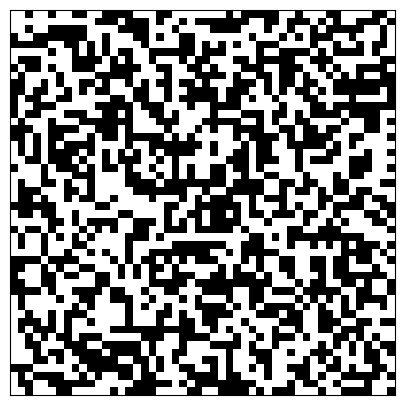

In [8]:

fig, axis = plt.subplots(figsize=(5, 5))
axis.set_xticks([]) 
axis.set_yticks([])
patch = plt.imshow(all_grid.iloc[0][0], cmap=plt.cm.binary)

def animate(i):
    patch.set_data(all_grid.iloc[i][0])

anim = animation.FuncAnimation(
    fig, animate, frames=MAX_GENERATIONS)

# La animación se guarda como GIF, para verla, abre el archivo creado en esta misma carpeta.
anim.save('game_of_life.gif', writer='imagemagick', fps=10)

